## Install conda and rdkit

**RDKit** is an open-source software toolkit used for cheminformatics in Python. It provides tools for working with chemical informatics, such as:

- **Molecular Representation:** RDKit allows you to represent molecules in various formats (e.g., SMILES, InChI).
- **Descriptors Calculation:** It can compute molecular descriptors, such as molecular weight, number of atoms, or Lipinski's rule of five parameters.
- **Molecular Fingerprints:** It generates molecular fingerprints used in similarity searching and clustering.
- **Visualization:** RDKit can visualize chemical structures and molecular properties.
- **Chemical Reactions:** It enables the handling of chemical reactions, including reaction templates and transformations.
- **Machine Learning Integration:** You can use RDKit with machine learning libraries (like scikit-learn) for predictive modeling, such as predicting drug activity or toxicity.

It's commonly used for drug discovery, computational chemistry, and bioinformatics tasks.

In [ ]:
# Step 1: Download and install Miniconda (Python 3.10 version)
!wget https://repo.anaconda.com/miniconda/Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
!chmod +x Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
!bash ./Miniconda3-py310_23.3.1-0-Linux-x86_64.sh -b -f -p /usr/local

# Step 2: Initialize conda and activate base environment
!conda init bash
!conda update conda -y
!conda install python=3.10 -y

# Step 3: Install RDKit
!conda install -c rdkit rdkit -y

# Step 4: Add the installed conda environment to the system path
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages/')

--2024-09-28 10:53:26--  https://repo.anaconda.com/miniconda/Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73134376 (70M) [application/x-sh]
Saving to: ‘Miniconda3-py310_23.3.1-0-Linux-x86_64.sh.1’

Miniconda3-py310_23 100%[===================>]  69.75M   137MB/s    in 0.5s    

2024-09-28 10:53:27 (137 MB/s) - ‘Miniconda3-py310_23.3.1-0-Linux-x86_64.sh.1’ saved [73134376/73134376]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...





Preparing transaction: - \ | done
Executing transaction: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may

## read bioactivity data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,active
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,intermediate
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,inactive
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive


"**Canonical SMILES**" stands for "**Simplified Molecular Input Line Entry System**," which is a text-based way to represent the structure of chemical molecules. It encodes a molecule's structure as a single line of text using a standardized notation.

### Example:
- **Molecule**: Ethanol
- **Canonical SMILES**: `CCO`

Here, the canonical SMILES for ethanol (`CCO`) represents:
- `C` for carbon atoms
- `O` for an oxygen atom

### Purpose:
Canonical SMILES are commonly used in cheminformatics for:
- Comparing molecules.
- Storing molecular structures in databases.
- Input for molecular modeling and prediction tasks, like bioactivity prediction in drug discovery.

This representation is helpful because it allows computational tools to interpret and process molecular structures efficiently.

In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.00,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.00,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.00,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
6364,CHEMBL2238282,160.00,active,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl
6365,CHEMBL4636881,7943.28,intermediate,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...
6366,CHEMBL4635134,100000.00,inactive,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O
6367,CHEMBL4639128,63095.73,inactive,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...


## Lipinski Function
**Lipinski's Rule of Five** is a set of guidelines proposed by Christopher A. Lipinski in 1997 to evaluate whether a chemical compound has properties that would make it a likely **orally active drug** in humans. These rules are widely used in **drug discovery** to assess the "drug-likeness" of compounds.

### Lipinski's Rule of Five:
There are four main rules (called the "Rule of Five" because the numbers involved are multiples of five):

1. **Molecular weight** (MW) should be =< 500 daltons.
2. **LogP (octanol-water partition coefficient)** should be =< 5. LogP measures the compound's hydrophobicity, which impacts absorption.
3. **Number of hydrogen bond donors** (HBD) should be =< 5. Hydrogen bond donors are typically -OH or -NH groups.
4. **Number of hydrogen bond acceptors** (HBA) should be =< 10. Hydrogen bond acceptors are typically oxygen or nitrogen atoms.




### Import libraries

In [ ]:
!pip install rdkit-pypi

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

## Calculate descriptors

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.80320,0.0,6.0
1,376.913,4.55460,0.0,5.0
2,426.851,5.35740,0.0,5.0
3,404.845,4.70690,0.0,5.0
4,346.334,3.09530,0.0,6.0
...,...,...,...,...
6364,331.868,5.28790,0.0,3.0
6365,414.477,3.95740,3.0,4.0
6366,325.368,1.14840,2.0,4.0
6367,511.626,5.60034,1.0,8.0


## Combine DataFrames
Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.80320,0.0,6.0
1,376.913,4.55460,0.0,5.0
2,426.851,5.35740,0.0,5.0
3,404.845,4.70690,0.0,5.0
4,346.334,3.09530,0.0,6.0
...,...,...,...,...
6364,331.868,5.28790,0.0,3.0
6365,414.477,3.95740,3.0,4.0
6366,325.368,1.14840,2.0,4.0
6367,511.626,5.60034,1.0,8.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,active
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,intermediate
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,inactive
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive


Combine the 2 DataFrames

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,312.325,2.80320,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,376.913,4.55460,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,426.851,5.35740,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,404.845,4.70690,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,346.334,3.09530,0.0,6.0
...,...,...,...,...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,active,331.868,5.28790,0.0,3.0
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,intermediate,414.477,3.95740,3.0,4.0
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,inactive,325.368,1.14840,2.0,4.0
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive,511.626,5.60034,1.0,8.0


## Convert IC50 to pIC50
Converting **IC50** to **pIC50** is a common transformation in pharmacology and drug discovery. It helps in making the data easier to interpret and compare, especially when dealing with large ranges of IC50 values. Here’s a breakdown of what it means and how it's done:

### IC50 (Inhibitory Concentration 50):
- **IC50** represents the concentration of a compound required to inhibit a biological or biochemical function by **50%**.
- It is expressed in **molar** units, such as micromolar (µM), nanomolar (nM), etc.
- A **lower IC50** value indicates a more potent inhibitor, meaning it takes less of the compound to achieve 50% inhibition.

### pIC50:
- **pIC50** is the **negative logarithm** (base 10) of the IC50 value. It transforms the IC50 value into a more manageable, standardized number.
- The formula for converting IC50 to pIC50 is:
  
  \[
  \text{pIC50} = -\log_{10}(\text{IC50 (in molar units)})
  \]

- **Higher pIC50** values correspond to more potent inhibitors because pIC50 increases as IC50 decreases.

### Why Convert to pIC50?
- **Ease of comparison**: pIC50 compresses large ranges of IC50 values into a smaller, more manageable range.
- **Directionality**: A higher pIC50 represents greater potency (similar to how a lower IC50 does), making the interpretation more intuitive.
- **Normalization**: It allows you to work with a more normalized scale, particularly when comparing drug potencies across different compounds.


In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

,standard_value
count,6.369000e+03
mean,1.032539e+05
std,9.065149e+05
min,0.000000e+00
25%,1.445000e+02
50%,2.260000e+03
75%,1.580000e+04
max,4.960000e+07


In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,750.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,100.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,50000.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,300.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,800.00
...,...,...,...,...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,active,331.868,5.28790,0.0,3.0,160.00
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,intermediate,414.477,3.95740,3.0,4.0,7943.28
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,325.368,1.14840,2.0,4.0,100000.00
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,inactive,511.626,5.60034,1.0,8.0,63095.73


In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,6.369000e+03
mean,1.032539e+05
std,9.065149e+05
min,0.000000e+00
25%,1.445000e+02
50%,2.260000e+03
75%,1.580000e+04
max,4.960000e+07


In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-26-0b3e49fdfb56>:10: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,active,331.868,5.28790,0.0,3.0,6.795880
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,intermediate,414.477,3.95740,3.0,4.0,5.100000
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,325.368,1.14840,2.0,4.0,4.000000
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,inactive,511.626,5.60034,1.0,8.0,4.200000


In [ ]:
df_final.pIC50.describe()

,pIC50
count,6369.000000
mean,inf
std,NaN
min,1.304518
25%,4.801343
50%,5.645892
75%,6.840132
max,inf


In [ ]:
df_final.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

## Removing the 'intermediate' bioactivity class from dataset

This can be beneficial for:

1.   Improved Model Performance:
  *   Including an 'intermediate' class can introduce noise and ambiguity, as it may not have a distinct biological meaning.

2.   Clearer Interpretation:
  *   When the classes are binary (active vs. inactive), it becomes easier to interpret model results. Stakeholders can make more straightforward decisions based on whether a compound is likely to be effective (active) or ineffective (inactive).







In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6363,CHEMBL2238280,Cc1ccc(C(=O)/C=C/c2ccc(N3CCCCC3)cc2)s1,active,311.450,4.94292,0.0,3.0,6.886057
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,active,331.868,5.28790,0.0,3.0,6.795880
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,325.368,1.14840,2.0,4.0,4.000000
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,inactive,511.626,5.60034,1.0,8.0,4.200000


In [ ]:
df_2class.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

In [ ]:
print(df_2class[['MW', 'LogP', 'pIC50', 'class']].isnull().sum())

MW       0
LogP     0
pIC50    0
class    0
dtype: int64


In [ ]:
df_cleaned = df_2class.dropna(subset=['MW', 'LogP', 'pIC50', 'class'])

## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

### Import libraries



In [ ]:
import seaborn as sb
sb.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot of the 2 bioactivity classes

Text(0, 0.5, 'Frequency')

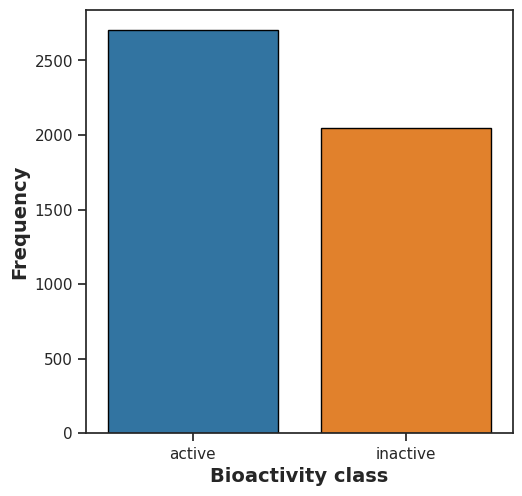

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sb.countplot(x='class', hue='class', data=df_2class, edgecolor='black', palette=['#1f77b4', '#ff7f0e'], legend=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

## Box plots
pIC50 value

Text(0, 0.5, 'pIC50 value')

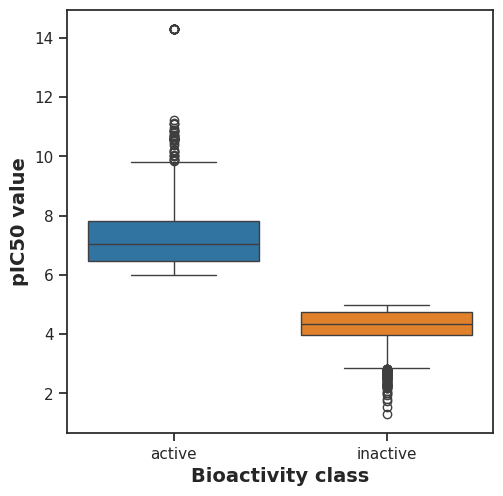

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sb.boxplot(x='class', y='pIC50', data=df_2class, hue='class', palette=['#1f77b4', '#ff7f0e'], dodge=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

### Statistical analysis | Mann-Whitney U Test

The Mann-Whitney U Test is a valuable statistical tool for comparing two independent groups, especially when the assumptions of traditional parametric tests cannot be met. It provides insights into the differences between groups without requiring specific distributional assumptions.


In [ ]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5535088.0,0.0,0.05,Different distribution (reject H0)


### Molecular Weight

Text(0, 0.5, 'MW')

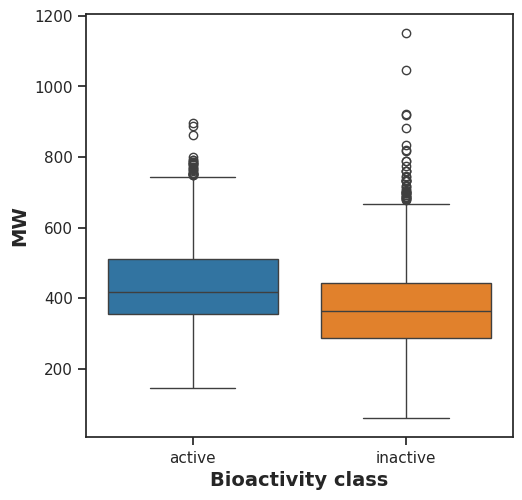

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sb.boxplot(x = 'class', y = 'MW', data = df_2class, hue='class', palette=['#1f77b4', '#ff7f0e'], legend=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3583448.0,5.124833e-68,0.05,Different distribution (reject H0)


### LogP

Text(0, 0.5, 'LogP')

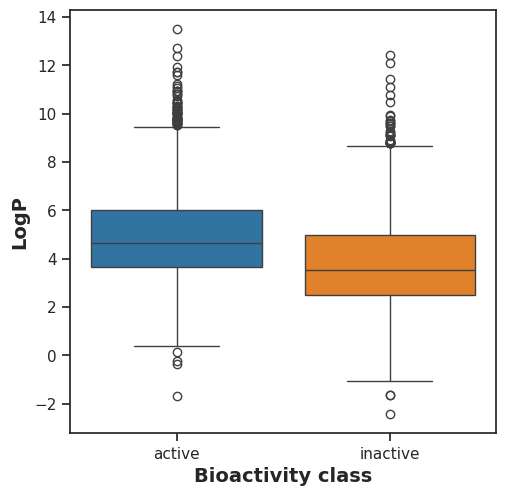

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sb.boxplot(x = 'class', y = 'LogP', data = df_2class, hue='class', palette=['#1f77b4', '#ff7f0e'], legend=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')


### Statistical analysis | Mann-Whitney U Test

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3706669.5,1.677683e-89,0.05,Different distribution (reject H0)


### NumHDonors

Text(0, 0.5, 'NumHDonors')

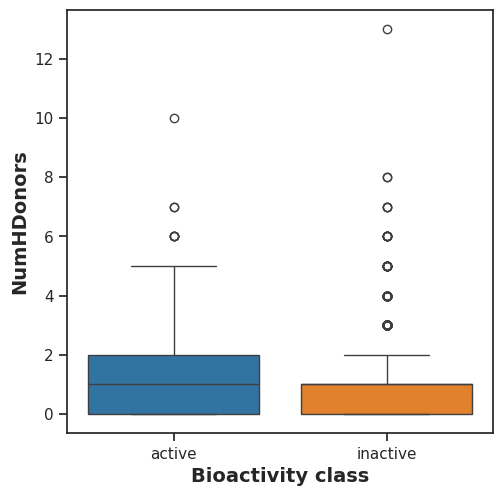

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sb.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, hue='class', palette=['#1f77b4', '#ff7f0e'], legend=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

### Statistical analysis | Mann-Whitney U Test

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3132896.5,2.554465e-16,0.05,Different distribution (reject H0)


### NumHAcceptors

Text(0, 0.5, 'NumHAcceptors')

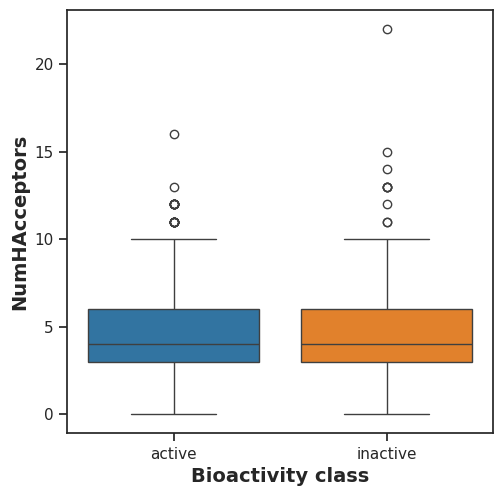

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sb.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, hue='class', palette=['#1f77b4', '#ff7f0e'], legend=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2981077.5,0.000004,0.05,Different distribution (reject H0)


### Interpretation of Statistical Results
Box Plots
pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.